In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ham_spam = pd.read_csv('emails.csv', encoding='latin-1', sep=',')
ham_spam.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [2]:
ham_spam["text"] = ham_spam["text"].apply(lambda x: x[9:])
ham_spam.head()

,text,spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1


In [3]:
spam = ham_spam[ham_spam["spam"]==1]
ham = ham_spam[ham_spam["spam"]==0]

len(spam), len(ham)

(1368, 4360)

In [4]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re 

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("stopwords")

stemmer_obj = PorterStemmer()
lemmatizer_obj = WordNetLemmatizer()
list_stop_words_obj = set(stopwords.words("english"))


def clean_features_nltk(features, stemmer, lemmatizer, list_stop_words):
    clean_features = []
    for sentence in range(0, len(features)):
        sentence = re.sub(r'\W', ' ', str(features[sentence]))
        sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
        sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', sentence)
        sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)
        sentence = re.sub(r'^b\s+', '', sentence)
        sentence = sentence.lower()
        list_words = word_tokenize(sentence)
        list_words = [stemmer.stem(word) for word in list_words]
        list_words = [lemmatizer.lemmatize(word) for word in list_words]
        list_words = [word for word in list_words if (word.casefold() not in list_stop_words)]
        sentence = " ".join(list_words)
        clean_features.append(sentence)
    return clean_features

[nltk_data] Downloading package punkt to /home/nyanmaruk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nyanmaruk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/nyanmaruk/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nyanmaruk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
ham_spam["text"] = ham_spam["text"].apply(lambda x: clean_features_nltk([x], stemmer_obj, lemmatizer_obj, list_stop_words_obj)[0])

In [6]:
ham_spam.head()

,text,spam
0,natur irresist corpor ident lt realli hard rec...,1
1,stock trade gunsling fanni merril muzo colza a...,1
2,unbeliev new home made easi im want show thi h...,1
3,4 color print special request addit inform cli...,1
4,money get softwar cd softwar compat great grow...,1


In [7]:
mails = ham_spam["text"]

corpuses = []
for mail in mails:
    corpuses.append(mail)
    
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpuses).toarray()

y = ham_spam["spam"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)

accuracy_score(y_test, y_pred)



[[872  13]
 [  1 260]]


0.987783595113438

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       885
           1       0.95      1.00      0.97       261

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



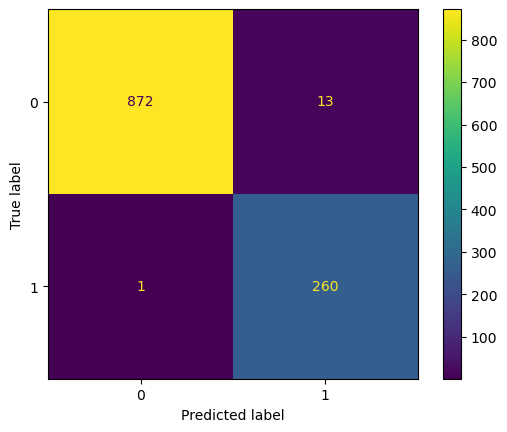

In [9]:
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(cm, display_labels=classifier.classes_).plot(values_format='d')

In [17]:
test = "You have won a lottery of $1000. Please click on the link to claim your prize"

def test_email(test):
    test = clean_features_nltk([test], stemmer_obj, lemmatizer_obj, list_stop_words_obj)
    test = cv.transform(test).toarray()
    print(classifier.predict(test))
    if classifier.predict(test) == 0:
        print("This is ham email")
    else:
        print("This is spam email")

test_email(test)

[1]
This is spam email


In [14]:
test_email("This is spam email")

[1]
This is spam email
